# Using projections
## Simple area calculation example

In [1]:
import pandas as pd
import geopandas as gpd
import pyproj
from pyproj import CRS
import matplotlib.pyplot as plt

In [4]:
world = gpd.read_file('../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [5]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [6]:
world.shape

(258, 169)

In [8]:
world.drop_duplicates(subset='ISO_A3').shape

(237, 169)

In [9]:
world = world[['ISO_A3', 'ADMIN', 'geometry']].copy()
world.columns = ['iso', 'country', 'geometry']

<Axes: >

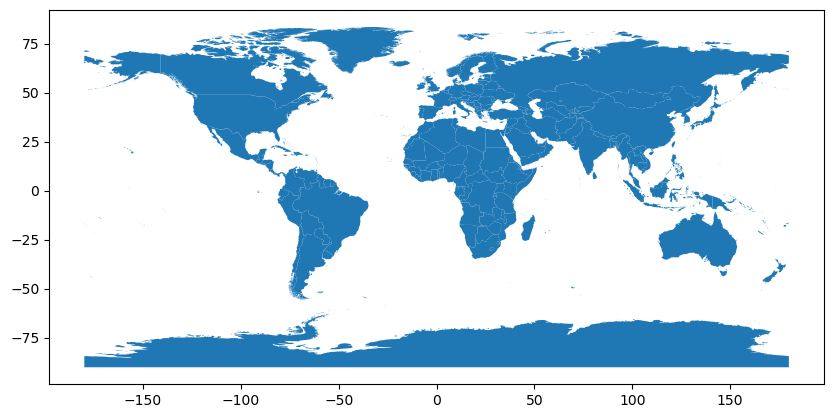

In [10]:
world.plot(figsize=(10, 6))

In [11]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
world.head()

,iso,country,geometry
0,IDN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


# Pick a projection

- List of available projections here: https://techoverflow.net/2019/06/22/how-to-list-available-projections-in-pyproj/
- Another exhaustive list: https://developers.arcgis.com/rest/services-reference/using-spatial-references.htm
- Choose wisely! https://xkcd.com/977/

Some equal area projections

https://en.wikipedia.org/wiki/Equal-area_map

# World cylindical equal area projection

In [14]:
wcea_crs = CRS.from_string("esri:54034")

In [15]:
world_cea = world.to_crs(crs=wcea_crs)

<Axes: >

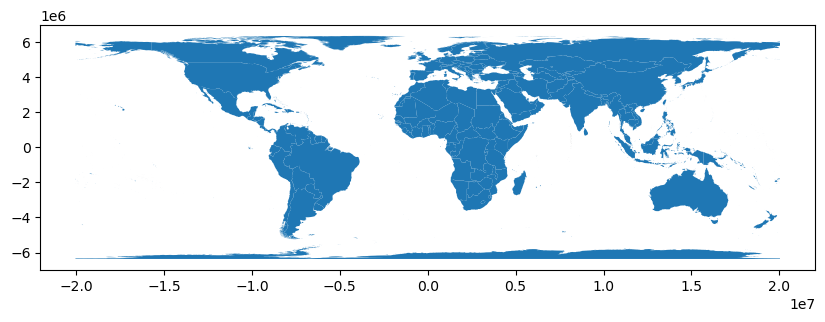

In [16]:
world_cea.plot(figsize=(10, 6))

In [17]:
world_cea.crs

<Projected CRS: ESRI:54034>
Name: World_Cylindrical_Equal_Area
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Cylindrical_Equal_Area
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Now we can calculate areas!**

In [18]:
world_cea['area_sqkm_cea'] = world_cea['geometry'].area / 10**6

In [19]:
world_cea.head()

,iso,country,geometry,area_sqkm_cea
0,IDN,Indonesia,"MULTIPOLYGON (((13102705.696 459972.334, 13102...",1.879826e+06
1,MYS,Malaysia,"MULTIPOLYGON (((13102705.696 459972.334, 13101...",3.278846e+05
2,CHL,Chile,"MULTIPOLYGON (((-7737827.685 -1906568.179, -77...",7.365950e+05
3,BOL,Bolivia,"POLYGON ((-7737827.685 -1906568.179, -7737828....",1.086808e+06
4,PER,Peru,"MULTIPOLYGON (((-7737827.685 -1906568.179, -77...",1.289867e+06


note how the polyon definitions have changed

In [20]:
world_cea[world_cea.iso == 'CHE']

,iso,country,geometry,area_sqkm_cea
91,CHE,Switzerland,"POLYGON ((1163712.926 4634233.125, 1163126.161...",41435.486668


https://en.wikipedia.org/wiki/Switzerland

not too bad...

We can also identify projections by (European Petroleum Survey Group) EPSG numbers for the purposes of `to_crs()`. For instance, we can get almost the same projection as follows

In [21]:
world_lcea = world.to_crs(epsg=3410)
world_lcea.crs

<Projected CRS: EPSG:3410>
Name: NSIDC EASE-Grid Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC Equal Area global projection
- method: Lambert Cylindrical Equal Area (Spherical)
Datum: NSIDC International 1924 Authalic Sphere
- Ellipsoid: International 1924 Authalic Sphere
- Prime Meridian: Greenwich

In [22]:
world_lcea['area_sqkm_cea'] = world_lcea['geometry'].area / 10**6
world_lcea[world_lcea.iso == 'CHE']

,iso,country,geometry,area_sqkm_cea
91,CHE,Switzerland,"POLYGON ((1006713.270 5368580.001, 1006205.668...",41328.841323


We can also get a bit more concise information on the crs

In [23]:
print(world_lcea.crs)

EPSG:3410


In [24]:
print(world_cea.crs)

esri:54034


In [25]:
print(world.crs)

EPSG:4326


`geopandas` uses `pyproj` (we used `pyproj.CRS` above to define a crs from a string) to handle co-ordinate reference systems. `pyproj` is a wrapper around `PROJ` (see here for the project: https://proj.org/)

Suppose we wanted to get an epsg code for some projection.

In [27]:
CRS.from_string('esri:54034').to_epsg()

We can use the `min_confidence` parameter to get the closest match

In [28]:
CRS.from_string('esri:54034').to_epsg(min_confidence=25)

6933

In [29]:
world_lcea = world.to_crs(epsg=6933)
world_lcea.crs

<Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
world_lcea['area_sqkm_cea'] = world_lcea['geometry'].area / 10**6
world_lcea[world_lcea.iso == 'CHE']

,iso,country,geometry,area_sqkm_cea
91,CHE,Switzerland,"POLYGON ((1008649.345 5346671.779, 1008140.766...",41435.486668


# World sinusoidal projection

In [32]:
wsea_crs = CRS.from_string('esri:54008')

In [33]:
world_sea = world.to_crs(crs=wsea_crs)

<Axes: >

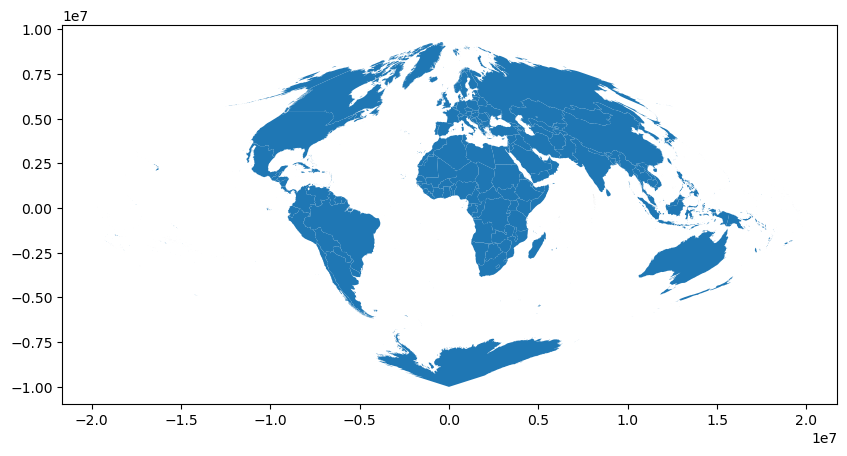

In [34]:
world_sea.plot(figsize=(10, 6))

In [35]:
world_sea['area_sqkm_sea'] = world_sea['geometry'].area / 10**6

In [36]:
world_sea.head()

,iso,country,geometry,area_sqkm_sea
0,IDN,Indonesia,"MULTIPOLYGON (((13068358.735 460374.676, 13068...",1.879815e+06
1,MYS,Malaysia,"MULTIPOLYGON (((13068358.735 460374.676, 13067...",3.278847e+05
2,CHL,Chile,"MULTIPOLYGON (((-7381665.976 -1936372.303, -73...",7.365987e+05
3,BOL,Bolivia,"POLYGON ((-7381665.976 -1936372.303, -7381712....",1.086808e+06
4,PER,Peru,"MULTIPOLYGON (((-7381665.976 -1936372.303, -73...",1.289868e+06


In [39]:
world_sea[world_sea.iso=="CHE"]

,iso,country,geometry,area_sqkm_sea
91,CHE,Switzerland,"POLYGON ((797083.933 5192175.467, 797158.181 5...",41435.646857


# Eckert II

In [40]:
eckert_crs = CRS.from_string('esri:54014')

In [41]:
world_eckert = world.to_crs(crs=eckert_crs)

<Axes: >

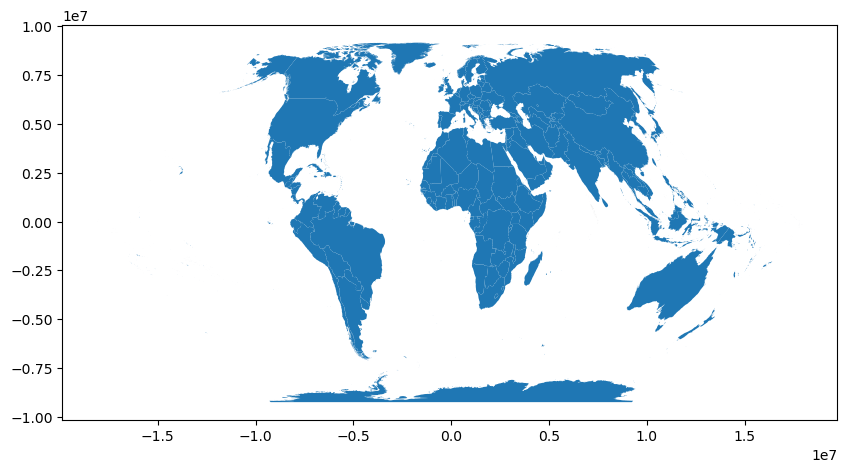

In [42]:
world_eckert.plot(figsize=(10, 6))

In [43]:
world_eckert['area_sqkm_eckert2'] = world_eckert['geometry'].area / 10**6

In [44]:
world_eckert.head()

,iso,country,geometry,area_sqkm_eckert2
0,IDN,Indonesia,"MULTIPOLYGON (((11738495.324 509642.480, 11738...",1.892355e+06
1,MYS,Malaysia,"MULTIPOLYGON (((11738495.324 509642.480, 11737...",3.300730e+05
2,CHL,Chile,"MULTIPOLYGON (((-6273471.140 -2215431.042, -62...",7.380122e+05
3,BOL,Bolivia,"POLYGON ((-6273471.140 -2215431.042, -6273529....",1.092897e+06
4,PER,Peru,"MULTIPOLYGON (((-6273471.140 -2215431.042, -62...",1.298026e+06


In [45]:
world_eckert[world_eckert.iso == "CHE"]

,iso,country,geometry,area_sqkm_eckert2
91,CHE,Switzerland,"POLYGON ((721371.343 6039906.544, 721237.106 6...",41418.607411


# Comparing areas

In [46]:
world_cea = world_cea[['iso', 'area_sqkm_cea']].copy()
world_sea = world_sea[['iso', 'area_sqkm_sea']].copy()
world_eckert = world_eckert[['iso', 'area_sqkm_eckert2']].copy()
df = pd.merge(pd.merge(world_cea, world_sea, on='iso', how='inner'), world_eckert, how='inner')

In [47]:
df.head(10)

,iso,area_sqkm_cea,area_sqkm_sea,area_sqkm_eckert2
0,IDN,1.879826e+06,1.879815e+06,1.892355e+06
1,MYS,3.278846e+05,3.278847e+05,3.300730e+05
2,CHL,7.365950e+05,7.365987e+05,7.380122e+05
3,BOL,1.086808e+06,1.086808e+06,1.092897e+06
4,PER,1.289867e+06,1.289868e+06,1.298026e+06
5,ARG,2.782896e+06,2.782893e+06,2.789353e+06
6,-99,1.274232e+02,1.274232e+02,1.277170e+02
7,-99,1.274232e+02,1.274232e+02,1.684708e+05
8,-99,1.274232e+02,1.274232e+02,6.371610e+05
9,-99,1.274232e+02,1.274232e+02,3.803914e+05


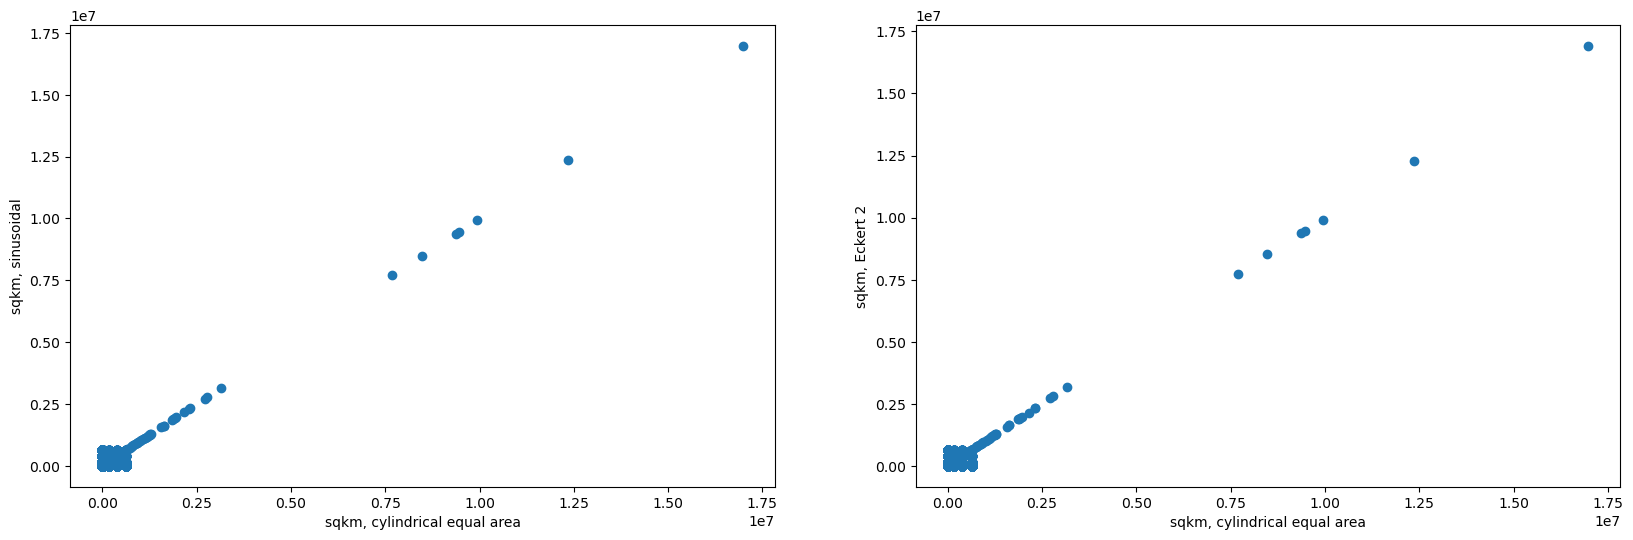

In [48]:
f, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(df.area_sqkm_cea, df.area_sqkm_sea)
ax[0].set_xlabel('sqkm, cylindrical equal area')
ax[0].set_ylabel('sqkm, sinusoidal')

ax[1].scatter(df.area_sqkm_cea, df.area_sqkm_eckert2)
ax[1].set_xlabel('sqkm, cylindrical equal area')
ax[1].set_ylabel('sqkm, Eckert 2')

plt.show()